In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfearture

In [2]:
ds = xr.open_dataset('Africa_cru_data.nc')
ds

<xarray.Dataset> Size: 378MB
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 126MB ...
    stn      (time, lat, lon) float64 252MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [15]:
prep=ds.pre
prep

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)> Size: 126MB
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [23]:
prep_ght = prep.sel(time=slice('2010-1','2020-12'),lon=slice(-3.5,1.5),lat=slice(4.5,11.5))
prep_ght

<xarray.DataArray 'pre' (time: 132, lat: 14, lon: 10)> Size: 74kB
[18480 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1kB 2010-01-16 2010-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [71]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [72]:
prep_t=prep_ght.groupby('time.month').sum('time')
prep_t

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.0000000e+00, 4.7639999e+02, 4.9760001e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [4.1269998e+02, 4.2900000e+02, 4.2050000e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [3.1490002e+02, 3.2630002e+02, 3.3089999e+02, ...,
         1.8320001e+02, 2.7299997e+02, 0.0000000e+00],
        ...,
        [1.6300001e+01, 5.2999997e+00, 1.0100000e+01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.3000000e+01, 6.3000002e+00, 6.0999999e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [7.0999994e+00, 7.0999999e+00, 7.1999998e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 5.4000000e+02, 5.6800000e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [5.8359998e+02, 6.3570001e+02, 6.2679999e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [6.1040002e+02, 6.4770001e+02, 6.6300006e+02, ...,
         3.5789999e+02, 5.8989996e+02, 0.0000000e+00],
...
         3.1700001e+01, 3.4500000e+01, 3.7600006e+01],
        [5.1100002e+01, 3.5100002e+01, 3.3699997e+01, ...,
         1.3200000e+01, 1.3900001e+01, 1.5599999e+01],
        [3.5000004e+01, 2.5599998e+01, 1.7800001e+01, ...,
         7.5000000e+00, 7.9999995e+00, 6.0000000e+00]],

       [[0.0000000e+00, 6.7640002e+02, 6.8020001e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [5.8860004e+02, 5.9109998e+02, 5.5609998e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [4.7250000e+02, 4.7729999e+02, 4.7429999e+02, ...,
         3.0639999e+02, 3.9060004e+02, 0.0000000e+00],
        ...,
        [3.2000000e+00, 2.8000000e+00, 3.1999993e+00, ...,
         7.5999999e+00, 1.6600002e+01, 1.7900002e+01],
        [1.5000000e+00, 1.5000000e+00, 2.0000002e+00, ...,
         6.1999998e+00, 1.3300000e+01, 6.1999998e+00],
        [8.0000001e-01, 8.0000001e-01, 9.0000004e-01, ...,
         4.4000001e+00, 9.5000000e+00, 7.0000000e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [73]:
prep_T=prep_t.groupby('month').mean('month')
prep_T

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.0000000e+00, 4.7639999e+02, 4.9760001e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [4.1269998e+02, 4.2900000e+02, 4.2050000e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [3.1490002e+02, 3.2630002e+02, 3.3089999e+02, ...,
         1.8320001e+02, 2.7299997e+02, 0.0000000e+00],
        ...,
        [1.6300001e+01, 5.2999997e+00, 1.0100000e+01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.3000000e+01, 6.3000002e+00, 6.0999999e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [7.0999994e+00, 7.0999999e+00, 7.1999998e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 5.4000000e+02, 5.6800000e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [5.8359998e+02, 6.3570001e+02, 6.2679999e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [6.1040002e+02, 6.4770001e+02, 6.6300006e+02, ...,
         3.5789999e+02, 5.8989996e+02, 0.0000000e+00],
...
         3.1700001e+01, 3.4500000e+01, 3.7600006e+01],
        [5.1100002e+01, 3.5100002e+01, 3.3699997e+01, ...,
         1.3200000e+01, 1.3900001e+01, 1.5599999e+01],
        [3.5000004e+01, 2.5599998e+01, 1.7800001e+01, ...,
         7.5000000e+00, 7.9999995e+00, 6.0000000e+00]],

       [[0.0000000e+00, 6.7640002e+02, 6.8020001e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [5.8860004e+02, 5.9109998e+02, 5.5609998e+02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [4.7250000e+02, 4.7729999e+02, 4.7429999e+02, ...,
         3.0639999e+02, 3.9060004e+02, 0.0000000e+00],
        ...,
        [3.2000000e+00, 2.8000000e+00, 3.1999993e+00, ...,
         7.5999999e+00, 1.6600002e+01, 1.7900002e+01],
        [1.5000000e+00, 1.5000000e+00, 2.0000002e+00, ...,
         6.1999998e+00, 1.3300000e+01, 6.1999998e+00],
        [8.0000001e-01, 8.0000001e-01, 9.0000004e-01, ...,
         4.4000001e+00, 9.5000000e+00, 7.0000000e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [83]:
where=prep_T.groupby('month').where(prep_T>250)
where

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[       nan,  476.4    ,  497.6    , ...,        nan,
                nan,        nan],
        [ 412.69998,  429.     ,  420.5    , ...,        nan,
                nan,        nan],
        [ 314.90002,  326.30002,  330.9    , ...,        nan,
          272.99997,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  540.     ,  568.     , ...,        nan,
                nan,        nan],
        [ 583.6    ,  635.7    ,  626.8    , ...,        nan,
                nan,        nan],
        [ 610.4    ,  647.7    ,  663.00006, ...,  357.9    ,
          589.89996,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  676.4    ,  680.2    , ...,        nan,
                nan,        nan],
        [ 588.60004,  591.1    ,  556.1    , ...,        nan,
                nan,        nan],
        [ 472.5    ,  477.3    ,  474.3    , ...,  306.4    ,
          390.60004,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [88]:
filled_data = where.fillna(0)
filled_data

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[   0.     ,  476.4    ,  497.6    , ...,    0.     ,
            0.     ,    0.     ],
        [ 412.69998,  429.     ,  420.5    , ...,    0.     ,
            0.     ,    0.     ],
        [ 314.90002,  326.30002,  330.9    , ...,    0.     ,
          272.99997,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  540.     ,  568.     , ...,    0.     ,
            0.     ,    0.     ],
        [ 583.6    ,  635.7    ,  626.8    , ...,    0.     ,
            0.     ,    0.     ],
        [ 610.4    ,  647.7    ,  663.00006, ...,  357.9    ,
          589.89996,    0.     ],
...
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  676.4    ,  680.2    , ...,    0.     ,
            0.     ,    0.     ],
        [ 588.60004,  591.1    ,  556.1    , ...,    0.     ,
            0.     ,    0.     ],
        [ 472.5    ,  477.3    ,  474.3    , ...,  306.4    ,
          390.60004,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

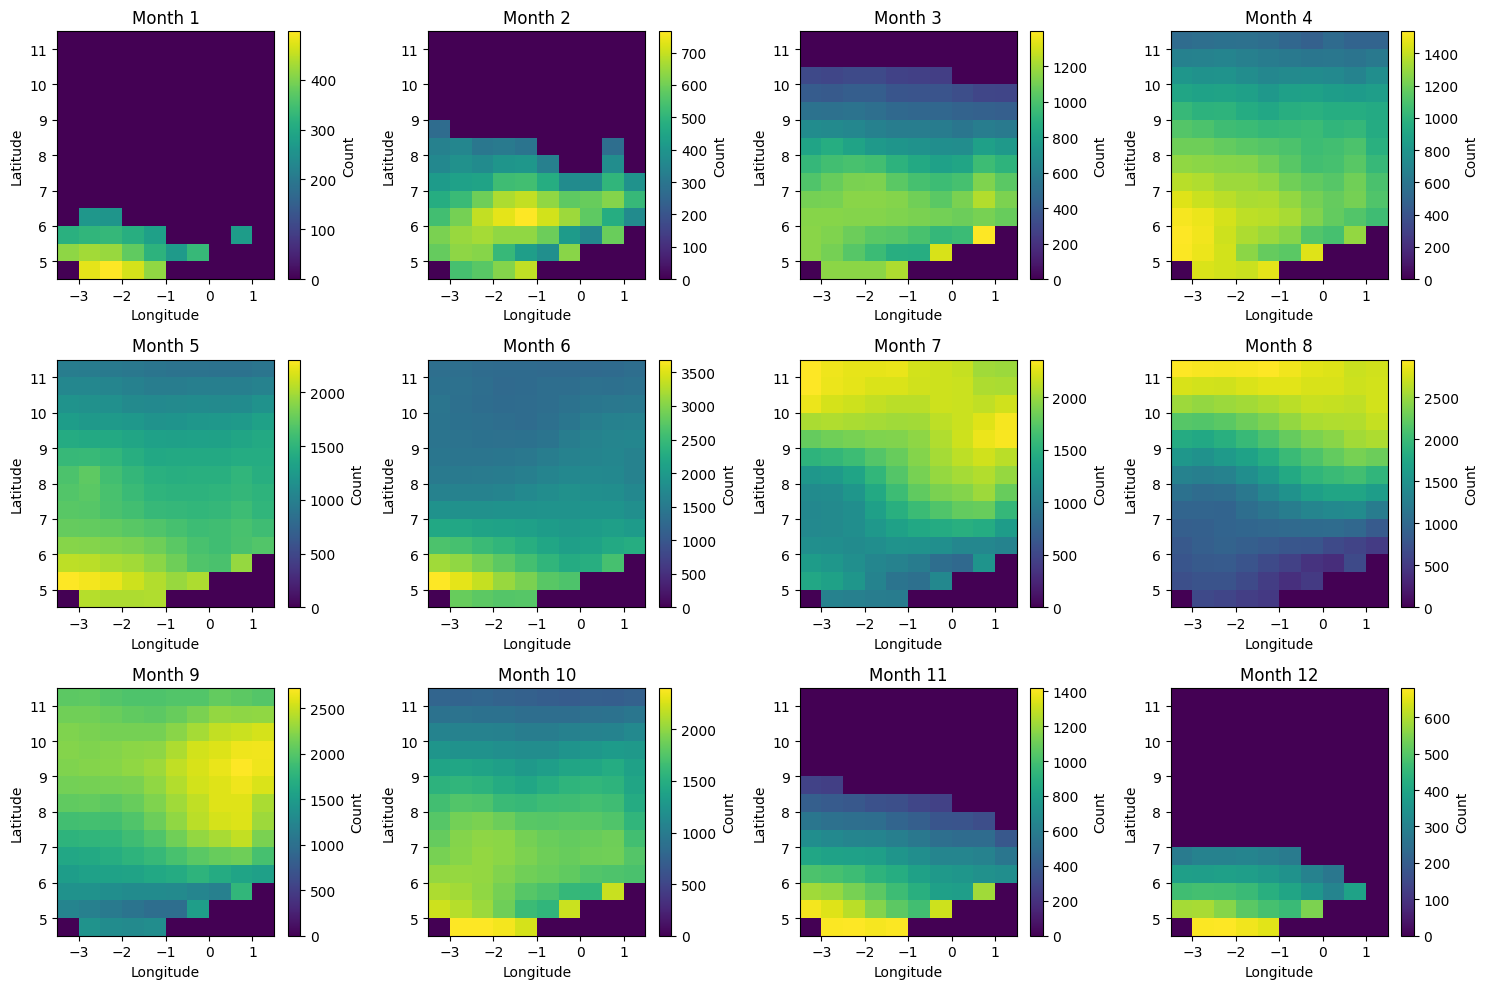

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  
axes = axes.flatten()


for i in range(12):  
    month_data = filled_data.isel(month=i)
    month_data.plot(ax=axes[i], cmap='viridis', cbar_kwargs={'label': 'Count'})
    axes[i].set_title(f'Month {i + 1}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

plt.tight_layout()
plt.show()